In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## LOAD THE MODULE FOR  SIMPLE LINEAR REGRESSION

In [5]:
from sklearn.linear_model import LinearRegression

## create the linear module object

In [6]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## (How could Highway-mpg help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.)

In [7]:
X = df[['highway-mpg']]  # X is independent
Y = df['price']  # Y is depenedent 

## Fit the linear model using highway-mpg.

In [8]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## we can output a prediction

In [9]:
Yhat=lm.predict(X)
Yhat[0:10]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [10]:
Yhat.mean()

13207.129353233831

## to find the value of intercept

In [11]:
lm.intercept_

38423.305858157386

## to find the coefficient or the value of slope

In [12]:
lm.coef_

array([-821.73337832])

## how to Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [13]:
lm1= LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm1.fit(df[['engine-size']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# *******************@@@@@@@@*****************

## LOAD THE MODULE FOR  SIMPLE LINEAR REGRESSION

In [14]:
## MODEL USING DIFFERENT VARIABLES

In [15]:
Z= df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [16]:
lm.fit(Z, df['price'])   # fitting the linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.intercept_

-15806.624626329198

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

In [19]:
lm2= LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm2.intercept_

38201.31327245728

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Model evaluating using visualization

In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

## Regression plot

(0, 48275.86707446027)

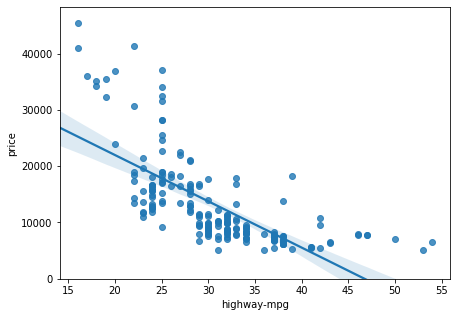

In [23]:
width = 7
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47431.73866061525)

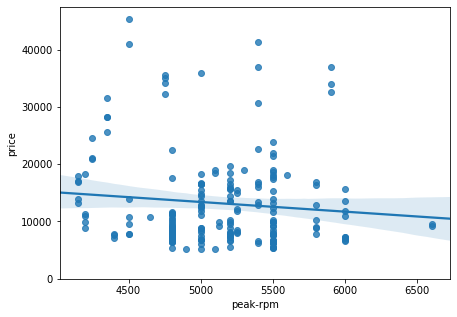

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(0, 47892.002798600835)

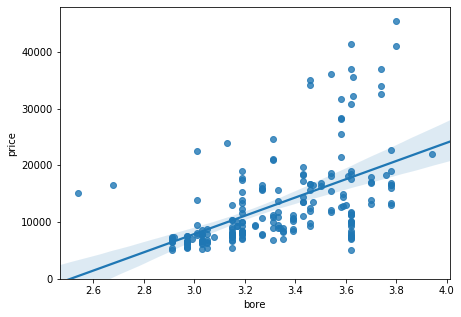

In [50]:
plt.figure(figsize=(width, height))
sns.regplot(x="bore", y="price", data=df)
plt.ylim(0,)

## Find the correlation betweeen the above graphs

In [25]:
df[["peak-rpm","highway-mpg","bore", "price"]].corr()

,peak-rpm,highway-mpg,bore,price
peak-rpm,1.000000,-0.058598,-0.267392,-0.101616
highway-mpg,-0.058598,1.000000,-0.591309,-0.704692
bore,-0.267392,-0.591309,1.000000,0.543155
price,-0.101616,-0.704692,0.543155,1.000000


## Residual Plot

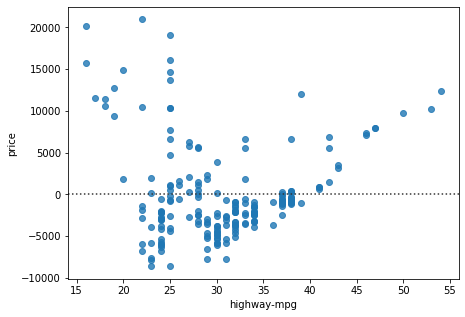

In [26]:
width = 7
height = 5
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

## make a porediction for multiple regression

In [27]:
Yhat2= lm.predict(Z)
Yhat2[0:3]

array([13699.11161184, 13699.11161184, 19051.65470233])

In [28]:
Yhat2.mean()

13207.129353233833

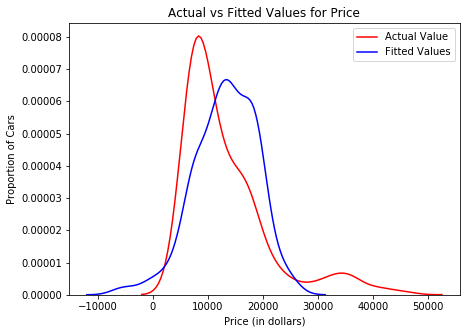

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway-mpg']
y = df['price']

In [32]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


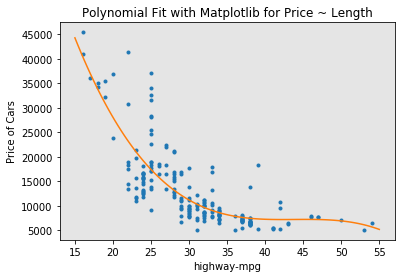

In [33]:
PlotPolly(p, x, y, 'highway-mpg')

In [77]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

## how to create a 11 order polynomial model with variable x and y

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


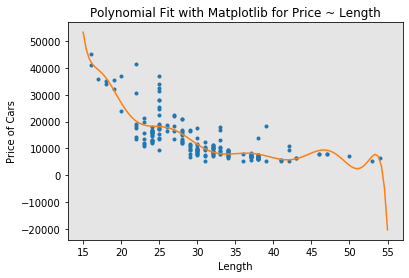

In [79]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

 We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points. But it's not true actually. By making more fitting the actual data it gives more overfitting errors..
 
The MSE and Resdiual errors R^2 error is also not good in this cae because of this reason

## Polynomial on multiple regressiion

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [44]:
Z_pr=pr.fit_transform(Z)

In [45]:
Z.shape

(201, 4)

In [46]:
Z_pr.shape

(201, 15)

## Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [51]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [53]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## measure of in sample evaluation

## Calculating the R^2 for SLR

In [54]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [58]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:7])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508 17879.97140011 17879.97140011]


In [60]:
## findingb the MSE and R^2 errors to determine which model is suits better

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


## calculating the R^2 for MLR

In [63]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [67]:
Y_predict_multifit = lm.predict(Z)
Y_predict_multifit[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [68]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [69]:
## clearly the MSE of SLR is more than MLR 31million and 11million

## Polynomial Fit

In [70]:
from sklearn.metrics import r2_score

In [71]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [72]:
mean_squared_error(df['price'], p(x))

20474146.42636125

## predicting and decision making

In [73]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [74]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [75]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

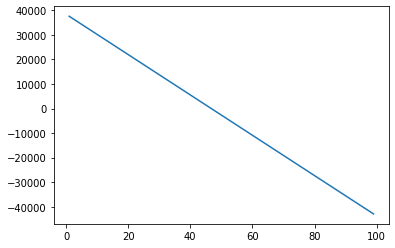

In [77]:
plt.plot(new_input, yhat)
plt.show()

## Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7
Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.